In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Correct file path
metadata_path = '/content/drive/MyDrive/csds395/HAM10000_metadata.csv'

# Load CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/csds395/HAM10000_metadata.csv')

#display DataFrame information
df.info()
df.duplicated()
df.drop_duplicates()
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical Columns : ', cat_col)
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical Columns : ', num_col)
print('Unique Cat Columns : ', df[cat_col].nunique())
print('Unique Num Columns : ', df[num_col].nunique())
df_cleaned = df.dropna(subset=['age'])
print(df_cleaned)


Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
Categorical Columns :  ['lesion_id', 'image_id', 'dx', 'dx_type', 'sex', 'localization']
Numerical Columns :  ['age']
Unique Cat Columns :  lesion_id        7470
image_id        10015
dx                  7
dx_type             4
sex                 3
localization       15
dtype: int64
Unique Num Columns :  age    18
dtype: int64
         lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  

In [2]:
# Install any missing dependencies
!pip install pandas numpy scikit-learn matplotlib

# Import necessary libraries 1234
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import shutil
from collections import Counter


Class distribution:
 dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


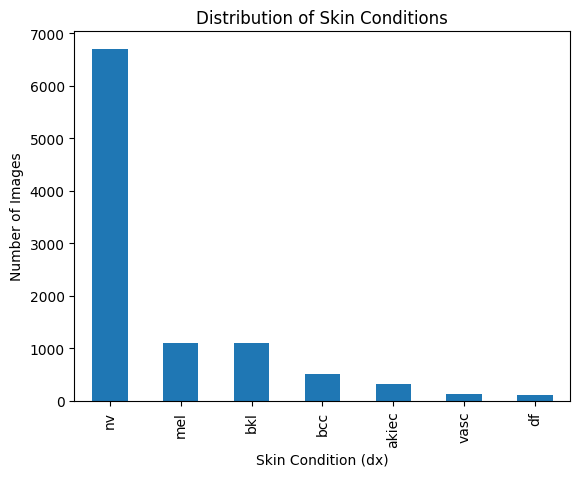

In [3]:
# Analyze the distribution of each skin condition
condition_counts = df['dx'].value_counts()
print("Class distribution:\n", condition_counts)

# Visualize the distribution
import matplotlib.pyplot as plt

condition_counts.plot(kind='bar', title='Distribution of Skin Conditions')
plt.xlabel('Skin Condition (dx)')
plt.ylabel('Number of Images')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

group12, group3 = train_test_split(
    df,
    test_size=1/3,          # 1/3 of the entire dataset
    stratify=df['dx'],      # keep dx distribution balanced
    random_state=42
)

group1, group2 = train_test_split(
    group12,
    test_size=0.5,          # half of the remaining => 1/3 each
    stratify=group12['dx'],
    random_state=42
)

print("\nSizes of each group:")
print("group1:", len(group1))
print("group2:", len(group2))
print("group3:", len(group3))




Sizes of each group:
group1: 3338
group2: 3338
group3: 3339


In [5]:


# 1. Check distribution of 'dx' in each group
print("\n-- Class distribution in each group --")
print("Group1:\n", group1['dx'].value_counts())
print("\nGroup2:\n", group2['dx'].value_counts())
print("\nGroup3:\n", group3['dx'].value_counts())



-- Class distribution in each group --
Group1:
 dx
nv       2234
mel       371
bkl       366
bcc       171
akiec     109
vasc       48
df         39
Name: count, dtype: int64

Group2:
 dx
nv       2235
mel       371
bkl       366
bcc       172
akiec     109
vasc       47
df         38
Name: count, dtype: int64

Group3:
 dx
nv       2236
mel       371
bkl       367
bcc       171
akiec     109
vasc       47
df         38
Name: count, dtype: int64


In [6]:
# 2. Save each group to its own CSV file
group1.to_csv("group1_metadata.csv", index=False)
group2.to_csv("group2_metadata.csv", index=False)
group3.to_csv("group3_metadata.csv", index=False)


In [18]:
# 3. Create output folders for each group
import os
import shutil

original_image_dir = "/content/drive/MyDrive/csds395/images"
output_dir = "/content/drive/MyDrive/csds395/output"

# Make sure subfolders exist
os.makedirs(os.path.join(output_dir, "group1"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "group2"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "group3"), exist_ok=True)

# Read the CSV file into a DataFrame
df = pd.read_csv("group1_metadata.csv")
df = pd.read_csv("group2_metadata.csv")
df = pd.read_csv("group3_metadata.csv")

# Save the DataFrame to the new path
df.to_csv("/content/drive/MyDrive/csds395/output/group1/group1_metadata.csv", index=False)  # index=False to avoid saving row numbers
df.to_csv("/content/drive/MyDrive/csds395/output/group2/group2_metadata.csv", index=False)
df.to_csv("/content/drive/MyDrive/csds395/output/group3/group3_metadata.csv", index=False)

print("File saved to /content/drive/MyDrive/csds395/output/group1/group1_metadata.csv")
print('File saved to /content/drive/MyDrive/csds395/output/group2/group2_metadata.csv')
print('File saved to /content/drive/MyDrive/csds395/output/group3/group3_metadata.csv')

File saved to /content/drive/MyDrive/csds395/output/group1/group1_metadata.csv
File saved to /content/drive/MyDrive/csds395/output/group2/group2_metadata.csv
File saved to /content/drive/MyDrive/csds395/output/group3/group3_metadata.csv
